Importação das bibliotecas necessárias.

In [1]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

Para facilitar o entendimento do banco de dados, exclui-se a coluna 13 que não é necessária e renomeia-se as colunas.

In [2]:
data = pd.read_csv("Dataset_spine.csv")
data = data.drop(['Unnamed: 13'], axis=1)
data.rename(columns = {
    "Col1" : "pelvic_incidence", 
    "Col2" : "pelvic_tilt",
    "Col3" : "lumbar_lordosis_angle",
    "Col4" : "sacral_slope", 
    "Col5" : "pelvic_radius",
    "Col6" : "degree_spondylolisthesis", 
    "Col7" : "pelvic_slope",
    "Col8" : "direct_tilt",
    "Col9" : "thoracic_slope", 
    "Col10" :"cervical_tilt", 
    "Col11" : "sacrum_angle",
    "Col12" : "scoliosis_slope", 
    "Class_att" : "class"}, inplace=True)

In [3]:
y = data['class']
x = data.drop(['class'], axis = 1)
data

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,Normal


**EXPERIMENTO 1**

Utiliza-se apenas 20% dos dados do banco de dados para usar como treinamento e o restante será alocado para uso no teste.

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15)

Utiliza-se três camadas de unidades de processamento intermediário, a função sigmoidal como função de ativação e 500 como númrero máximo de interações.

In [5]:
clf = MLPClassifier(hidden_layer_sizes=(100,50,25,), activation='logistic', max_iter=500, random_state=42, verbose=True)
clf.fit(x_train, y_train)

Iteration 1, loss = 0.64699710
Iteration 2, loss = 0.64178186
Iteration 3, loss = 0.63778467
Iteration 4, loss = 0.63550049
Iteration 5, loss = 0.63354912
Iteration 6, loss = 0.63184340
Iteration 7, loss = 0.63065593
Iteration 8, loss = 0.62907951
Iteration 9, loss = 0.62756442
Iteration 10, loss = 0.62573880
Iteration 11, loss = 0.62380375
Iteration 12, loss = 0.62154187
Iteration 13, loss = 0.61931788
Iteration 14, loss = 0.61665258
Iteration 15, loss = 0.61375022
Iteration 16, loss = 0.61085673
Iteration 17, loss = 0.60773244
Iteration 18, loss = 0.60399598
Iteration 19, loss = 0.59951720
Iteration 20, loss = 0.59434223
Iteration 21, loss = 0.58813329
Iteration 22, loss = 0.58217381
Iteration 23, loss = 0.57602792
Iteration 24, loss = 0.56878620
Iteration 25, loss = 0.56105643
Iteration 26, loss = 0.55279656
Iteration 27, loss = 0.54479204
Iteration 28, loss = 0.53567061
Iteration 29, loss = 0.52626177
Iteration 30, loss = 0.51759395
Iteration 31, loss = 0.50849511
Iteration 32, los

c:\users\kevin\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 50, 25),
              max_iter=500, random_state=42, verbose=True)

In [6]:
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.8225806451612904

Como pode-se ver, chegou-se a uma acurácia de 82% utilizando essa configuração de MLP.

In [7]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

    Abnormal       0.88      0.86      0.87        44
      Normal       0.68      0.72      0.70        18

    accuracy                           0.82        62
   macro avg       0.78      0.79      0.79        62
weighted avg       0.83      0.82      0.82        62



O relatório nos mostra que obteve-se uma *precision* de 88% nos casos anormais e 68% nos casos normais, e um *recall* de 86% nos casos anormais e 72% nos casos normais.

In [8]:
y.value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

Como o banco de dados é desbalanceado, visto o número de casos anormais e normais, o valor da acurácia não é um boa métrica para avaliar a MLP, portanto, deve-se atentar as métricas *precision* e *recall* do *report*, pois são elas que nos dirão se o MLP está classificando corretamente os casos. *Precision* se diz respeito a porcentagem dos casos selecionados daquela classe que foram classificados corretamente, já *recall* significa a porcentagem dos casos totais daquela classe que seriam classificados corretamente.

Vamos agora alterar alguns dos parâmetros da MLP:

**EXPERIMENTO 2**

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=15)
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), activation='logistic', max_iter=500, random_state=42, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Iteration 1, loss = 0.67024566
Iteration 2, loss = 0.64236872
Iteration 3, loss = 0.63358321
Iteration 4, loss = 0.63752815
Iteration 5, loss = 0.64198806
Iteration 6, loss = 0.64131365
Iteration 7, loss = 0.63844617
Iteration 8, loss = 0.63671240
Iteration 9, loss = 0.63381061
Iteration 10, loss = 0.62967288
Iteration 11, loss = 0.62449397
Iteration 12, loss = 0.62125073
Iteration 13, loss = 0.61740508
Iteration 14, loss = 0.61322855
Iteration 15, loss = 0.60866736
Iteration 16, loss = 0.60480839
Iteration 17, loss = 0.59977024
Iteration 18, loss = 0.59384897
Iteration 19, loss = 0.58738872
Iteration 20, loss = 0.58148577
Iteration 21, loss = 0.57477812
Iteration 22, loss = 0.56644647
Iteration 23, loss = 0.55708925
Iteration 24, loss = 0.54686711
Iteration 25, loss = 0.53596548
Iteration 26, loss = 0.52380761
Iteration 27, loss = 0.51139480
Iteration 28, loss = 0.49765665
Iteration 29, loss = 0.48454518
Iteration 30, loss = 0.47046950
Iteration 31, loss = 0.45711939
Iteration 32, los

Como pode-se ver a acurácia, *precison* e o *recall* não mudaram muito.

Vamos agora tentar descobrir quais são as melhores variáveis para utilizar no nosso banco de dados da MLP para tentar maximizar a precisão dos casos.

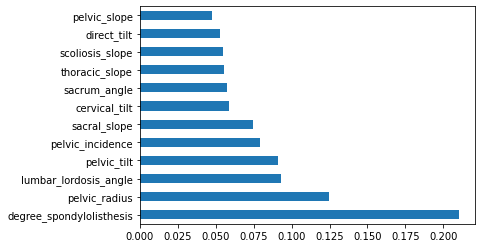

In [10]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

O gráfico nos mostra em ordem cresente as variáveis que mais impactam na classificação dos casos, logo, vamos descartar as primeiras 6 e utilizar o resto.

In [11]:
new_data = data[['degree_spondylolisthesis', 'pelvic_radius', 'pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'class']]
y = new_data['class']
x = new_data.drop(['class'], axis = 1)

**EXPERIMENTO 3**

Vamos treinar várias configurações de MLP para tentar descobrir uma possível boa implementação de MLP para o problema. 

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15)
clf = MLPClassifier(hidden_layer_sizes=(100,50,25,), activation='logistic', max_iter=500, random_state=42, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)


Iteration 1, loss = 0.70112488
Iteration 2, loss = 0.68654367
Iteration 3, loss = 0.67462953
Iteration 4, loss = 0.66398732
Iteration 5, loss = 0.65432369
Iteration 6, loss = 0.64666128
Iteration 7, loss = 0.64006787
Iteration 8, loss = 0.63399689
Iteration 9, loss = 0.63055873
Iteration 10, loss = 0.62797376
Iteration 11, loss = 0.62460442
Iteration 12, loss = 0.62275161
Iteration 13, loss = 0.62038554
Iteration 14, loss = 0.61821419
Iteration 15, loss = 0.61588486
Iteration 16, loss = 0.61339693
Iteration 17, loss = 0.61064566
Iteration 18, loss = 0.60747443
Iteration 19, loss = 0.60388243
Iteration 20, loss = 0.60041992
Iteration 21, loss = 0.59622385
Iteration 22, loss = 0.59223184
Iteration 23, loss = 0.58780858
Iteration 24, loss = 0.58354370
Iteration 25, loss = 0.57911310
Iteration 26, loss = 0.57405196
Iteration 27, loss = 0.56849718
Iteration 28, loss = 0.56288560
Iteration 29, loss = 0.55697413
Iteration 30, loss = 0.55057633
Iteration 31, loss = 0.54448569
Iteration 32, los

**EXPERIMENTO 4**

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=15)
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), activation='logistic', max_iter=500, random_state=42, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Iteration 1, loss = 0.92920079
Iteration 2, loss = 0.82382960
Iteration 3, loss = 0.74420212
Iteration 4, loss = 0.68556225
Iteration 5, loss = 0.65105628
Iteration 6, loss = 0.63663051
Iteration 7, loss = 0.63306369
Iteration 8, loss = 0.63498458
Iteration 9, loss = 0.63990479
Iteration 10, loss = 0.64611492
Iteration 11, loss = 0.64727877
Iteration 12, loss = 0.64367007
Iteration 13, loss = 0.63714182
Iteration 14, loss = 0.63000314
Iteration 15, loss = 0.62114728
Iteration 16, loss = 0.61419522
Iteration 17, loss = 0.60774688
Iteration 18, loss = 0.60491405
Iteration 19, loss = 0.60188012
Iteration 20, loss = 0.60046049
Iteration 21, loss = 0.59861906
Iteration 22, loss = 0.59550898
Iteration 23, loss = 0.59079922
Iteration 24, loss = 0.58449005
Iteration 25, loss = 0.57702586
Iteration 26, loss = 0.56996210
Iteration 27, loss = 0.56371703
Iteration 28, loss = 0.55889126
Iteration 29, loss = 0.55414330
Iteration 30, loss = 0.54803574
Iteration 31, loss = 0.53917196
Iteration 32, los

**EXPERIMENTO 5**

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.1, random_state=13)
clf = MLPClassifier(max_iter=500, alpha=0.0001, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Iteration 1, loss = 3.71738978
Iteration 2, loss = 1.94622495
Iteration 3, loss = 1.61577107
Iteration 4, loss = 1.76901085
Iteration 5, loss = 1.83617669
Iteration 6, loss = 1.67968086
Iteration 7, loss = 1.42264068
Iteration 8, loss = 1.22609802
Iteration 9, loss = 1.17763667
Iteration 10, loss = 1.20148741
Iteration 11, loss = 1.19996115
Iteration 12, loss = 1.11385794
Iteration 13, loss = 0.98152947
Iteration 14, loss = 0.86627376
Iteration 15, loss = 0.82322411
Iteration 16, loss = 0.80542995
Iteration 17, loss = 0.74186859
Iteration 18, loss = 0.65793461
Iteration 19, loss = 0.60460877
Iteration 20, loss = 0.60121241
Iteration 21, loss = 0.56704661
Iteration 22, loss = 0.50602992
Iteration 23, loss = 0.49098714
Iteration 24, loss = 0.49242111
Iteration 25, loss = 0.45585493
Iteration 26, loss = 0.44005354
Iteration 27, loss = 0.46549931
Iteration 28, loss = 0.44839272
Iteration 29, loss = 0.41831806
Iteration 30, loss = 0.42921667
Iteration 31, loss = 0.42148893
Iteration 32, los

**EXPERIMENTO 6**

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.1, random_state=13)
clf = MLPClassifier(hidden_layer_sizes=(100,300,500), max_iter=500, alpha=0.0001, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Iteration 1, loss = 4.18053179
Iteration 2, loss = 3.06956696
Iteration 3, loss = 3.63974751
Iteration 4, loss = 2.59067636
Iteration 5, loss = 0.84144554
Iteration 6, loss = 1.75168293
Iteration 7, loss = 1.23335428
Iteration 8, loss = 0.52121603
Iteration 9, loss = 1.28152747
Iteration 10, loss = 0.71092368
Iteration 11, loss = 0.56408290
Iteration 12, loss = 0.68366841
Iteration 13, loss = 0.43239231
Iteration 14, loss = 0.49767449
Iteration 15, loss = 0.43101336
Iteration 16, loss = 0.38111237
Iteration 17, loss = 0.47460165
Iteration 18, loss = 0.34621426
Iteration 19, loss = 0.42910345
Iteration 20, loss = 0.38736083
Iteration 21, loss = 0.36995121
Iteration 22, loss = 0.42110589
Iteration 23, loss = 0.33337216
Iteration 24, loss = 0.37447422
Iteration 25, loss = 0.34000749
Iteration 26, loss = 0.34700286
Iteration 27, loss = 0.34216936
Iteration 28, loss = 0.32773363
Iteration 29, loss = 0.34746268
Iteration 30, loss = 0.32482433
Iteration 31, loss = 0.34244164
Iteration 32, los

Pode-se ver que as últimas duas configurações de MLP apresentam excelentes resultados de acurácia, *precision* e *recall*, portanto, são possíveis boas candidatas a serem implementadas.

A equipe levantou a hipótese de que o fato de a quantidade de dados "Abnormal" estar acima da quantidade de dados "Normal" está baixando a precisão para classificação de dados "Normal" nos primeiros exemplos deste ralatório e baixando a acurácia geral nos dois exemplos acima (melhores resultados até então). Para testar isso, vamos igualar a quantidade de dados "Abnormal" e "Normal" com duas abordagens. Primeiro, expluindo os 110 primeiros dados "Abnormal" e depois, excluindo 110 dados "Abnormal" de modo aleatório.


**EXPERIMENTO 7**

Abaixo, segue o exemplo excluindo os 110 primeiros dados "Abnormal", utilizando o dataset do primeiro experimento e o MLP classifier do primeiro experimento, ou seja, antes da aplicação de todas as melhorias propostas pelos experimentos acima:

In [16]:
data1 = pd.read_csv("Dataset_spine.csv")
data1 = data1.drop(['Unnamed: 13'], axis=1)
data1.rename(columns = {
    "Col1" : "pelvic_incidence", 
    "Col2" : "pelvic_tilt",
    "Col3" : "lumbar_lordosis_angle",
    "Col4" : "sacral_slope", 
    "Col5" : "pelvic_radius",
    "Col6" : "degree_spondylolisthesis", 
    "Col7" : "pelvic_slope",
    "Col8" : "direct_tilt",
    "Col9" : "thoracic_slope", 
    "Col10" :"cervical_tilt", 
    "Col11" : "sacrum_angle",
    "Col12" : "scoliosis_slope", 
    "Class_att" : "class"}, inplace=True)

new_data_copy = data1

new_data3 = new_data_copy.copy()

for i in range(110):
    new_data3.drop((i+1),axis=0,inplace=True)

y = new_data3['class']
x = new_data3.drop(['class'], axis = 1)
print(y.value_counts())

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=15)
clf = MLPClassifier(hidden_layer_sizes=(100,50,25,), activation='logistic', max_iter=500, random_state=42, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Abnormal    100
Normal      100
Name: class, dtype: int64
Iteration 1, loss = 0.70557907
Iteration 2, loss = 0.70216837
Iteration 3, loss = 0.69914504
Iteration 4, loss = 0.69651227
Iteration 5, loss = 0.69426537
Iteration 6, loss = 0.69238677
Iteration 7, loss = 0.69084330
Iteration 8, loss = 0.68958895
Iteration 9, loss = 0.68856457
Iteration 10, loss = 0.68769780
Iteration 11, loss = 0.68690556
Iteration 12, loss = 0.68610178
Iteration 13, loss = 0.68520861
Iteration 14, loss = 0.68416510
Iteration 15, loss = 0.68293005
Iteration 16, loss = 0.68147986
Iteration 17, loss = 0.67980555
Iteration 18, loss = 0.67790815
Iteration 19, loss = 0.67579307
Iteration 20, loss = 0.67346696
Iteration 21, loss = 0.67093678
Iteration 22, loss = 0.66821015
Iteration 23, loss = 0.66529510
Iteration 24, loss = 0.66219665
Iteration 25, loss = 0.65891446
Iteration 26, loss = 0.65543999
Iteration 27, loss = 0.65175675
Iteration 28, loss = 0.64784587
Iteration 29, loss = 0.64369002
Iteration 30, loss = 0.

Percebe-se que podemos alcançar resultados similares aos dois melhores resultados apresentados até então apenas com esta técnica.

Agora verificamos o que acontece se ao invés de removermos 110 casos 'Abnormal' nos adicionarmos 110 casos 'Normal' através da replicação de outros casos, para que o dataset fique igual

In [17]:
data2 = pd.read_csv("Dataset_spine.csv")
data2 = data2.drop(['Unnamed: 13'], axis=1)
data2.rename(columns = {
    "Col1" : "pelvic_incidence", 
    "Col2" : "pelvic_tilt",
    "Col3" : "lumbar_lordosis_angle",
    "Col4" : "sacral_slope", 
    "Col5" : "pelvic_radius",
    "Col6" : "degree_spondylolisthesis", 
    "Col7" : "pelvic_slope",
    "Col8" : "direct_tilt",
    "Col9" : "thoracic_slope", 
    "Col10" :"cervical_tilt", 
    "Col11" : "sacrum_angle",
    "Col12" : "scoliosis_slope", 
    "Class_att" : "class"}, inplace=True)

new_data_copy = data2

new_data4 = new_data_copy.copy()
new_data5 = new_data_copy.copy()
new_data6 = new_data_copy.copy()

for i in range(210):
    new_data5.drop((i+1),axis=0,inplace=True)

for i in range(298):
    new_data6.drop((i+1),axis=0,inplace=True)
    
new_data4 = new_data4.append(new_data5, ignore_index=True)
new_data4 = new_data4.append(new_data6, ignore_index=True)

for i in range(2):
    new_data4.drop((i+1),axis=0,inplace=True)

y = new_data4['class']
x = new_data4.drop(['class'], axis = 1)
print(y.value_counts())

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=15)
clf = MLPClassifier(hidden_layer_sizes=(100,50,25,), activation='logistic', max_iter=500, random_state=42, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Normal      210
Abnormal    210
Name: class, dtype: int64
Iteration 1, loss = 0.70985117
Iteration 2, loss = 0.70219480
Iteration 3, loss = 0.69710815
Iteration 4, loss = 0.69423380
Iteration 5, loss = 0.69203732
Iteration 6, loss = 0.68938282
Iteration 7, loss = 0.68862488
Iteration 8, loss = 0.68725632
Iteration 9, loss = 0.68583953
Iteration 10, loss = 0.68377183
Iteration 11, loss = 0.68134456
Iteration 12, loss = 0.67853915
Iteration 13, loss = 0.67527539
Iteration 14, loss = 0.67183270
Iteration 15, loss = 0.66808823
Iteration 16, loss = 0.66409610
Iteration 17, loss = 0.65957494
Iteration 18, loss = 0.65438576
Iteration 19, loss = 0.64822100
Iteration 20, loss = 0.64164767
Iteration 21, loss = 0.63368043
Iteration 22, loss = 0.62505848
Iteration 23, loss = 0.61567113
Iteration 24, loss = 0.60555772
Iteration 25, loss = 0.59466328
Iteration 26, loss = 0.58319217
Iteration 27, loss = 0.57119916
Iteration 28, loss = 0.55852184
Iteration 29, loss = 0.54588097
Iteration 30, loss = 0.

Nota-se que os resultados melhoram signficativamente em relação aos primeiros testes do relatório e aos primeiros testes com número igual de testes por remoção, porém ainda não atingem os melhores resultados, verificamos agora com alguns parâmetros modificados

In [18]:
data2 = pd.read_csv("Dataset_spine.csv")
data2 = data2.drop(['Unnamed: 13'], axis=1)
data2.rename(columns = {
    "Col1" : "pelvic_incidence", 
    "Col2" : "pelvic_tilt",
    "Col3" : "lumbar_lordosis_angle",
    "Col4" : "sacral_slope", 
    "Col5" : "pelvic_radius",
    "Col6" : "degree_spondylolisthesis", 
    "Col7" : "pelvic_slope",
    "Col8" : "direct_tilt",
    "Col9" : "thoracic_slope", 
    "Col10" :"cervical_tilt", 
    "Col11" : "sacrum_angle",
    "Col12" : "scoliosis_slope", 
    "Class_att" : "class"}, inplace=True)

new_data_copy = data2

new_data4 = new_data_copy.copy()
new_data5 = new_data_copy.copy()
new_data6 = new_data_copy.copy()

for i in range(210):
    new_data5.drop((i+1),axis=0,inplace=True)

for i in range(298):
    new_data6.drop((i+1),axis=0,inplace=True)
    
new_data4 = new_data4.append(new_data5, ignore_index=True)
new_data4 = new_data4.append(new_data6, ignore_index=True)

for i in range(2):
    new_data4.drop((i+1),axis=0,inplace=True)

y = new_data4['class']
x = new_data4.drop(['class'], axis = 1)
print(y.value_counts())

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.1, random_state=13)
clf = MLPClassifier(hidden_layer_sizes=(100,300,500), max_iter=500, alpha=0.0001, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Normal      210
Abnormal    210
Name: class, dtype: int64
Iteration 1, loss = 5.84122804
Iteration 2, loss = 6.27105446
Iteration 3, loss = 1.38516489
Iteration 4, loss = 2.68236498
Iteration 5, loss = 0.94470670
Iteration 6, loss = 1.30782394
Iteration 7, loss = 1.06735854
Iteration 8, loss = 0.64792154
Iteration 9, loss = 0.91400842
Iteration 10, loss = 0.75389003
Iteration 11, loss = 0.43405639
Iteration 12, loss = 0.58700806
Iteration 13, loss = 0.39637752
Iteration 14, loss = 0.42095716
Iteration 15, loss = 0.44974188
Iteration 16, loss = 0.33671101
Iteration 17, loss = 0.40358617
Iteration 18, loss = 0.34367114
Iteration 19, loss = 0.34850256
Iteration 20, loss = 0.36071407
Iteration 21, loss = 0.30663875
Iteration 22, loss = 0.32244620
Iteration 23, loss = 0.31520218
Iteration 24, loss = 0.30484298
Iteration 25, loss = 0.29753149
Iteration 26, loss = 0.30584735
Iteration 27, loss = 0.29473086
Iteration 28, loss = 0.29175328
Iteration 29, loss = 0.28958845
Iteration 30, loss = 0.

Nota-se uma melhoria nos resultados em relação ao teste anterior, tornando-o um conjunto de parâmetros bem sólido, porém ele também não atinge as melhores métricas de outros experimentos.


**EXPERIMENTO 8**

Abaixo, segue o exemplo excluindo 110 dados "Abnormal" de forma randômica, utilizando o dataset do primeiro experimento e o MLP classifier do primeiro experimento, ou seja, antes da aplicação de todas as melhorias propostas pelos experimentos acima. A intenção, assim como no experimento passado, é igualar o número de casos "Abnormal" e "Normal", mas agora de modo randômico:

In [17]:
import random
data1 = pd.read_csv("Dataset_spine.csv")
data1 = data1.drop(['Unnamed: 13'], axis=1)
data1.rename(columns = {
    "Col1" : "pelvic_incidence", 
    "Col2" : "pelvic_tilt",
    "Col3" : "lumbar_lordosis_angle",
    "Col4" : "sacral_slope", 
    "Col5" : "pelvic_radius",
    "Col6" : "degree_spondylolisthesis", 
    "Col7" : "pelvic_slope",
    "Col8" : "direct_tilt",
    "Col9" : "thoracic_slope", 
    "Col10" :"cervical_tilt", 
    "Col11" : "sacrum_angle",
    "Col12" : "scoliosis_slope", 
    "Class_att" : "class"}, inplace=True)

new_data_copy = data1

new_data3 = new_data_copy.copy()

range_list = random.sample(range(210), 110)

for i in range_list:
    new_data3.drop(i,axis=0,inplace=True)

y = new_data3['class']
x = new_data3.drop(['class'], axis = 1)
print(y.value_counts())

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=15)
clf = MLPClassifier(hidden_layer_sizes=(100,50,25,), activation='logistic', max_iter=500, random_state=42, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(report)

Normal      100
Abnormal    100
Name: class, dtype: int64
Iteration 1, loss = 0.70525253
Iteration 2, loss = 0.70199683
Iteration 3, loss = 0.69914905
Iteration 4, loss = 0.69670467
Iteration 5, loss = 0.69465490
Iteration 6, loss = 0.69298227
Iteration 7, loss = 0.69165647
Iteration 8, loss = 0.69063494
Iteration 9, loss = 0.68986351
Iteration 10, loss = 0.68927711
Iteration 11, loss = 0.68880185
Iteration 12, loss = 0.68836005
Iteration 13, loss = 0.68787862
Iteration 14, loss = 0.68729726
Iteration 15, loss = 0.68657365
Iteration 16, loss = 0.68568449
Iteration 17, loss = 0.68462322
Iteration 18, loss = 0.68339493
Iteration 19, loss = 0.68200987
Iteration 20, loss = 0.68047951
Iteration 21, loss = 0.67881564
Iteration 22, loss = 0.67703057
Iteration 23, loss = 0.67513625
Iteration 24, loss = 0.67314245
Iteration 25, loss = 0.67105516
Iteration 26, loss = 0.66887514
Iteration 27, loss = 0.66659425
Iteration 28, loss = 0.66419575
Iteration 29, loss = 0.66166307
Iteration 30, loss = 0.

Percebe-se que as precisões e a acurácia aumentaram significativamente com relação aos primeiros testes deste ralatório, antes das melhorias sujeridas. Entretanto, apesar de os resultados serem satisfatórios, algumas das melhorias propostas acima, apresentam resultados melhores do que esta última abordagem..

**EXPERIMENTO 9**

Agora, uniremos a melhor abordagem para igualar a quantidade de casos que é retirar os 110 primeiros casos "Abnormal" do dataset com o melhor resultado das melhorias sugeridas na manipulação de parâmetros do MLP:

In [18]:
data1 = pd.read_csv("Dataset_spine.csv")
data1 = data1.drop(['Unnamed: 13'], axis=1)
data1.rename(columns = {
    "Col1" : "pelvic_incidence", 
    "Col2" : "pelvic_tilt",
    "Col3" : "lumbar_lordosis_angle",
    "Col4" : "sacral_slope", 
    "Col5" : "pelvic_radius",
    "Col6" : "degree_spondylolisthesis", 
    "Col7" : "pelvic_slope",
    "Col8" : "direct_tilt",
    "Col9" : "thoracic_slope", 
    "Col10" :"cervical_tilt", 
    "Col11" : "sacrum_angle",
    "Col12" : "scoliosis_slope", 
    "Class_att" : "class"}, inplace=True)

new_data_copy = data1

new_data3 = new_data_copy.copy()

for i in range(110):
    new_data3.drop((i+1),axis=0,inplace=True)

y = new_data3['class']
x = new_data3.drop(['class'], axis = 1)
print(y.value_counts())

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.1, random_state=13)
clf = MLPClassifier(hidden_layer_sizes=(100,300,500), max_iter=500, alpha=0.0001, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Normal      100
Abnormal    100
Name: class, dtype: int64
Iteration 1, loss = 9.57145669
Iteration 2, loss = 3.04981431
Iteration 3, loss = 2.04937849
Iteration 4, loss = 0.23131420
Iteration 5, loss = 0.88750839
Iteration 6, loss = 0.66295074
Iteration 7, loss = 0.25558814
Iteration 8, loss = 0.19944397
Iteration 9, loss = 0.34674114
Iteration 10, loss = 0.43874594
Iteration 11, loss = 0.36280414
Iteration 12, loss = 0.23538948
Iteration 13, loss = 0.16361426
Iteration 14, loss = 0.17019611
Iteration 15, loss = 0.22704951
Iteration 16, loss = 0.25330931
Iteration 17, loss = 0.22282467
Iteration 18, loss = 0.16276510
Iteration 19, loss = 0.12316628
Iteration 20, loss = 0.12400672
Iteration 21, loss = 0.14167897
Iteration 22, loss = 0.15327064
Iteration 23, loss = 0.14572482
Iteration 24, loss = 0.12309101
Iteration 25, loss = 0.10133468
Iteration 26, loss = 0.09259456
Iteration 27, loss = 0.09655471
Iteration 28, loss = 0.10366992
Iteration 29, loss = 0.10510142
Iteration 30, loss = 0.

Percebemos que, apesar de significante melhora com relação aos primeiros experimentos e de resultados similares aos experimentos que testaram apenas melhorias nos parâmetros do MLP, este experimento ainda está aquém do resultado do experimento 7, onde apenas o dataset foi manipulado não randomicamente de forma a igualar o número de casos "Abnormal" e "Normal".

**EXPERIMENTO 10**

Agora tentaremos uma abordagem similar à do experimento anterior, unindo as melhorias nos parâmetros MLP com o ato de igualar o número de casos, mas agora de modo randômico:

In [19]:
data1 = pd.read_csv("Dataset_spine.csv")
data1 = data1.drop(['Unnamed: 13'], axis=1)
data1.rename(columns = {
    "Col1" : "pelvic_incidence", 
    "Col2" : "pelvic_tilt",
    "Col3" : "lumbar_lordosis_angle",
    "Col4" : "sacral_slope", 
    "Col5" : "pelvic_radius",
    "Col6" : "degree_spondylolisthesis", 
    "Col7" : "pelvic_slope",
    "Col8" : "direct_tilt",
    "Col9" : "thoracic_slope", 
    "Col10" :"cervical_tilt", 
    "Col11" : "sacrum_angle",
    "Col12" : "scoliosis_slope", 
    "Class_att" : "class"}, inplace=True)

new_data_copy = data1

new_data3 = new_data_copy.copy()

range_list = random.sample(range(210), 110)

for i in range_list:
    new_data3.drop(i,axis=0,inplace=True)

y = new_data3['class']
x = new_data3.drop(['class'], axis = 1)
print(y.value_counts())

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.1, random_state=13)
clf = MLPClassifier(hidden_layer_sizes=(100,300,500), max_iter=500, alpha=0.0001, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Normal      100
Abnormal    100
Name: class, dtype: int64
Iteration 1, loss = 6.96113136
Iteration 2, loss = 4.61655230
Iteration 3, loss = 3.85224221
Iteration 4, loss = 0.76662784
Iteration 5, loss = 2.10022757
Iteration 6, loss = 2.20107138
Iteration 7, loss = 1.04339048
Iteration 8, loss = 0.65349406
Iteration 9, loss = 1.28166647
Iteration 10, loss = 1.41312419
Iteration 11, loss = 0.84521561
Iteration 12, loss = 0.58828292
Iteration 13, loss = 0.74067141
Iteration 14, loss = 0.90558749
Iteration 15, loss = 0.90089837
Iteration 16, loss = 0.72052130
Iteration 17, loss = 0.48784040
Iteration 18, loss = 0.39896617
Iteration 19, loss = 0.58912998
Iteration 20, loss = 0.62980539
Iteration 21, loss = 0.43345777
Iteration 22, loss = 0.35293315
Iteration 23, loss = 0.43410143
Iteration 24, loss = 0.50936687
Iteration 25, loss = 0.48654726
Iteration 26, loss = 0.39370726
Iteration 27, loss = 0.33859060
Iteration 28, loss = 0.38863199
Iteration 29, loss = 0.44051100
Iteration 30, loss = 0.